In [16]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import requests
from pprint import pprint
from census import Census
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from requests.structures import CaseInsensitiveDict
import datetime
from scipy import stats
import seaborn as sns
%matplotlib inline
import hvplot.pandas

In [17]:
load_arsenic = Path("Resources/arsenic_county_year.csv")
poverty_path = Path("Resources/minnesota_poverty_data.csv")
lead_path = Path("Resources/lead_by_blood_levels.csv")
water_arsenic = Path("Resources/water_arsenic.csv")

poverty_df = pd.read_csv(poverty_path)
arsenic_df = pd.read_csv(load_arsenic)
lead_df = pd.read_csv(lead_path)
water_arsenic_df = pd.read_csv(water_arsenic)
arsenic_df

,Unnamed: 0,year,countyServed,max arsenic (ug/L)
0,0,1998,Aitkin,4.40
1,1,1998,Anoka,11.00
2,2,1998,Becker,11.00
3,3,1998,Beltrami,3.80
4,4,1998,Benton,0.50
...,...,...,...,...
1898,1898,2022,Watonwan,8.94
1899,1899,2022,Wilkin,3.97
1900,1900,2022,Winona,3.03
1901,1901,2022,Wright,7.53


In [18]:
# Find the common years
common_years = set(poverty_df['Year']).intersection(lead_df['year'])

# Filter both DataFrames to include only the common years
filtered_poverty_df = poverty_df[poverty_df['Year'].isin(common_years)]
filtered_lead_df = lead_df[lead_df['year'].isin(common_years)]

# Perform the merge on the filtered DataFrames
poverty_lead_df = pd.merge(filtered_poverty_df, filtered_lead_df, left_on=['County', 'Year'], right_on=['location', 'year'], how='inner')

poverty_lead_df = poverty_lead_df[poverty_lead_df['unstable'] != True]

poverty_lead_df.head()

,Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,Females 16 to 17 Poverty,Females 18 to 24 Poverty,...,ageGroup,ebllDescription,pctEbll,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12
78,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,<3 years,>10 mcg/dL (historic reference level),0.4,27053.0,18638.0,76.0,46098.0,40.4,False,NaN
80,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,<6 years,>10 mcg/dL (historic reference level),0.4,27053.0,22063.0,95.0,91316.0,24.2,False,NaN
183,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,<3 years,>10 mcg/dL (historic reference level),0.5,27123.0,10398.0,49.0,21375.0,48.6,False,NaN
185,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,<6 years,>10 mcg/dL (historic reference level),0.5,27123.0,11824.0,63.0,41811.0,28.3,False,NaN
339,1124293.0,138258.0,73852.0,6581.0,1335.0,6466.0,2784.0,1023.0,2160.0,14161.0,...,<3 years,>10 mcg/dL (historic reference level),0.4,27053.0,18259.0,68.0,46675.0,39.1,False,NaN


In [19]:
city_count_per_county = water_arsenic_df.groupby('countyServed')['cityServed'].nunique()
city_count_per_county

countyServed
Aitkin              4
Anoka              21
Becker              5
Beltrami            4
Benton              3
                   ..
Watonwan            8
Wilkin              5
Winona              9
Wright             14
Yellow Medicine     9
Name: cityServed, Length: 87, dtype: int64

In [1]:
# Calculate the total number of unique schools
county_count = len(arsenic_df["countyServed"].unique())
county_count

NameError: name 'arsenic_df' is not defined

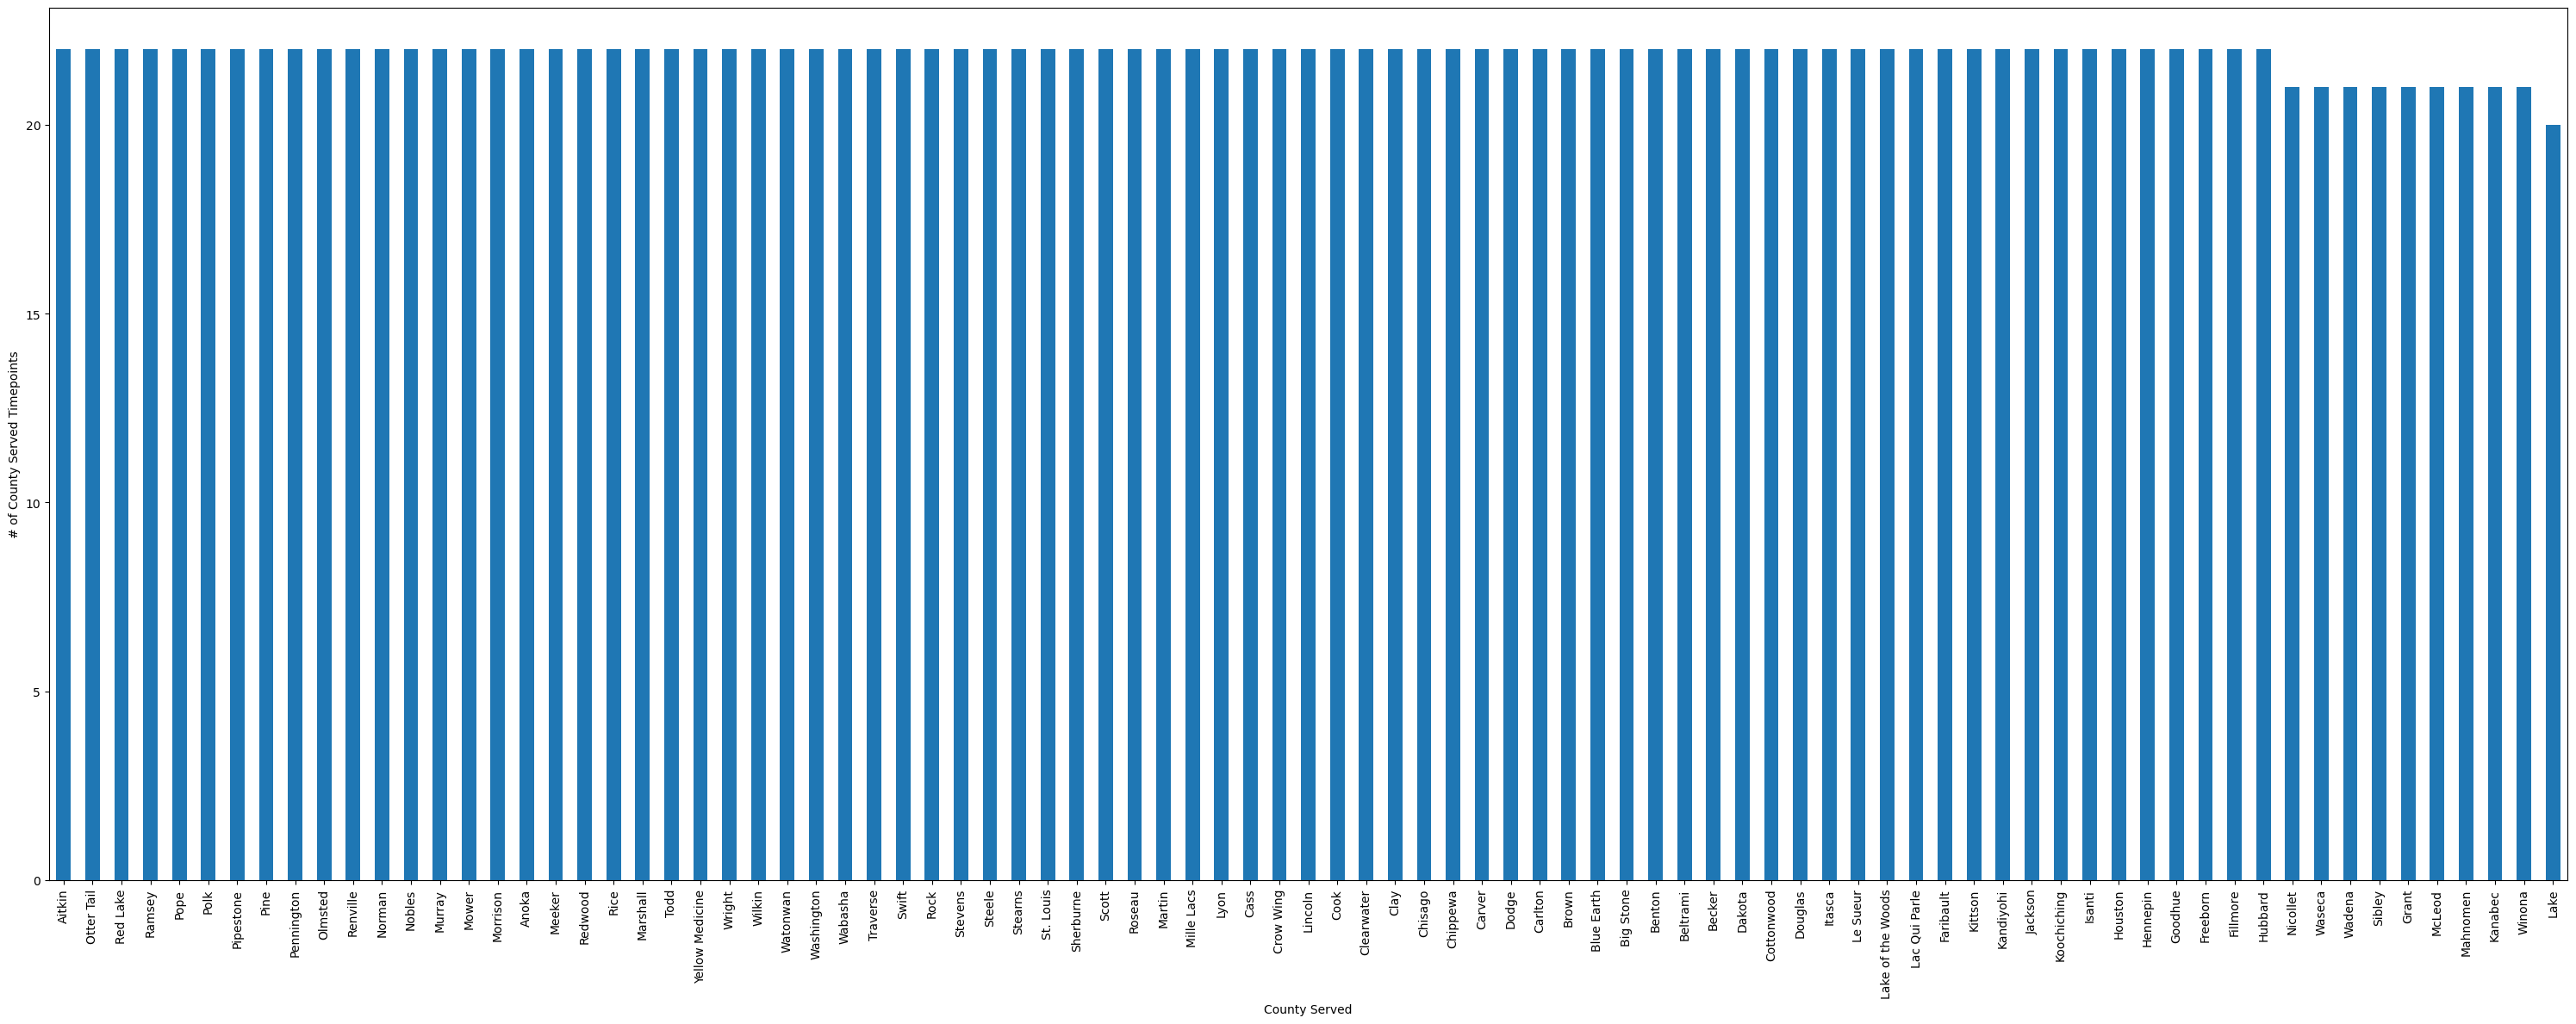

In [21]:
plt.figure(figsize=(30, 12))

observed_county = arsenic_df["countyServed"].value_counts()
observed_county.plot.bar(color='tab:blue') 
plt.xlabel("County Served")
plt.ylabel("# of County Served Timepoints")

plt.tight_layout()

plt.show()

In [22]:
data_complete = pd.merge(poverty_lead_df, arsenic_df, how="left", on=["year", "year"])
data_complete

,Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,Females 16 to 17 Poverty,Females 18 to 24 Poverty,...,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12,Unnamed: 0,countyServed,max arsenic (ug/L)
0,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,861.0,Aitkin,5.82
1,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,862.0,Anoka,12.60
2,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,863.0,Becker,15.70
3,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,864.0,Beltrami,5.56
4,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,865.0,Benton,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,1110.0,5470.0,...,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1811.0,Watonwan,3.76
3820,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,1110.0,5470.0,...,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1812.0,Wilkin,5.54
3821,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,1110.0,5470.0,...,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1813.0,Winona,2.96
3822,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,1110.0,5470.0,...,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1814.0,Wright,8.14


In [23]:
great_max_df = data_complete.groupby(["countyServed"])["max arsenic (ug/L)"].max()
great_max_df = great_max_df.reset_index()

merge_group_df = great_max_df.merge(data_complete, on=["countyServed", "max arsenic (ug/L)"], how="left")
merge_group_df.head()

,countyServed,max arsenic (ug/L),Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,...,ebllDescription,pctEbll,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12,Unnamed: 0
0,Aitkin,6.63,1234027.0,125264.0,67490.0,4596.0,780.0,6816.0,2778.0,695.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,16805.0,30.0,46388.0,36.2,False,NaN,1642.0
1,Aitkin,6.63,1234027.0,125264.0,67490.0,4596.0,780.0,6816.0,2778.0,695.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,18140.0,37.0,94305.0,19.2,False,NaN,1642.0
2,Aitkin,6.63,532911.0,71487.0,38754.0,3276.0,965.0,4786.0,1810.0,663.0,...,>10 mcg/dL (historic reference level),0.3,27123.0,9058.0,23.0,21720.0,41.7,False,NaN,1642.0
3,Aitkin,6.63,532911.0,71487.0,38754.0,3276.0,965.0,4786.0,1810.0,663.0,...,>10 mcg/dL (historic reference level),0.3,27123.0,9828.0,33.0,43959.0,22.4,False,NaN,1642.0
4,Aitkin,6.63,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,17458.0,35.0,44564.0,39.2,False,NaN,1729.0


In [24]:
idx = data_complete.groupby("countyServed")["max arsenic (ug/L)"].idxmax()
great_max_df = data_complete.loc[idx, ["countyServed", "max arsenic (ug/L)"]]
# Assuming 'data_complete' is your original DataFrame
# Replace "YourColumnName" with the actual column name you want to find the maximum for
great_max_df = data_complete.groupby("countyServed")["max arsenic (ug/L)"].idxmax()
great_max_df = data_complete.loc[great_max_df, ["countyServed", "max arsenic (ug/L)"]]

# Merge the DataFrames using the 'merge' function
merge_group_df = pd.merge(data_complete, great_max_df, on=["countyServed", "max arsenic (ug/L)"], how="inner")

# Display the result
merge_group_df


,Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,Females 16 to 17 Poverty,Females 18 to 24 Poverty,...,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12,Unnamed: 0,countyServed,max arsenic (ug/L)
0,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,862.0,Anoka,12.60
1,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,22063.0,95.0,91316.0,24.2,False,NaN,862.0,Anoka,12.60
2,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,27123.0,10398.0,49.0,21375.0,48.6,False,NaN,862.0,Anoka,12.60
3,488851.0,77325.0,42196.0,4308.0,814.0,4939.0,1955.0,651.0,1645.0,8132.0,...,27123.0,11824.0,63.0,41811.0,28.3,False,NaN,862.0,Anoka,12.60
4,1114933.0,134363.0,72361.0,6580.0,1295.0,6325.0,3163.0,1128.0,2234.0,14358.0,...,27053.0,18638.0,76.0,46098.0,40.4,False,NaN,863.0,Becker,15.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,1484.0,13050.0,...,27053.0,19469.0,44.0,91094.0,21.4,False,NaN,1814.0,Wright,8.14
1033,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,1110.0,5470.0,...,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1814.0,Wright,8.14
1034,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,1484.0,13050.0,...,27053.0,17458.0,35.0,44564.0,39.2,False,NaN,1815.0,Yellow Medicine,17.70
1035,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,1484.0,13050.0,...,27053.0,19469.0,44.0,91094.0,21.4,False,NaN,1815.0,Yellow Medicine,17.70


In [25]:
idx = data_complete.groupby("countyServed")["max arsenic (ug/L)"].idxmax()
great_max_df = data_complete.loc[idx, ["countyServed", "max arsenic (ug/L)"]]
merge_group_df = great_max_df.merge(data_complete, on=["countyServed", "max arsenic (ug/L)"], how="left")
merge_group_df = great_max_df.merge(data_complete, on=["countyServed", "max arsenic (ug/L)"], how="left", suffixes=('_max', '_original'))

merge_group_df


,countyServed,max arsenic (ug/L),Sample Population,Population Poverty,Female Poverty,Females < 5 Poverty,Females 5 Poverty,Females 6 to 11 Poverty,Females 12 to 14 Poverty,Females 15 Poverty,...,ebllDescription,pctEbll,fips,numTested,numEbll,denominator,pctTested,unstable,Unnamed: 12,Unnamed: 0
0,Aitkin,6.63,1234027.0,125264.0,67490.0,4596.0,780.0,6816.0,2778.0,695.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,16805.0,30.0,46388.0,36.2,False,NaN,1642.0
1,Aitkin,6.63,1234027.0,125264.0,67490.0,4596.0,780.0,6816.0,2778.0,695.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,18140.0,37.0,94305.0,19.2,False,NaN,1642.0
2,Aitkin,6.63,532911.0,71487.0,38754.0,3276.0,965.0,4786.0,1810.0,663.0,...,>10 mcg/dL (historic reference level),0.3,27123.0,9058.0,23.0,21720.0,41.7,False,NaN,1642.0
3,Aitkin,6.63,532911.0,71487.0,38754.0,3276.0,965.0,4786.0,1810.0,663.0,...,>10 mcg/dL (historic reference level),0.3,27123.0,9828.0,33.0,43959.0,22.4,False,NaN,1642.0
4,Aitkin,6.63,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,17458.0,35.0,44564.0,39.2,False,NaN,1729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,Wright,8.14,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,19469.0,44.0,91094.0,21.4,False,NaN,1814.0
1033,Wright,8.14,536204.0,70990.0,38305.0,3465.0,874.0,4739.0,1742.0,690.0,...,>10 mcg/dL (historic reference level),0.3,27123.0,10576.0,27.0,41920.0,25.2,False,NaN,1814.0
1034,Yellow Medicine,17.70,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,17458.0,35.0,44564.0,39.2,False,NaN,1815.0
1035,Yellow Medicine,17.70,1249220.0,123469.0,66986.0,4061.0,827.0,6283.0,2839.0,678.0,...,>10 mcg/dL (historic reference level),0.2,27053.0,19469.0,44.0,91094.0,21.4,False,NaN,1815.0


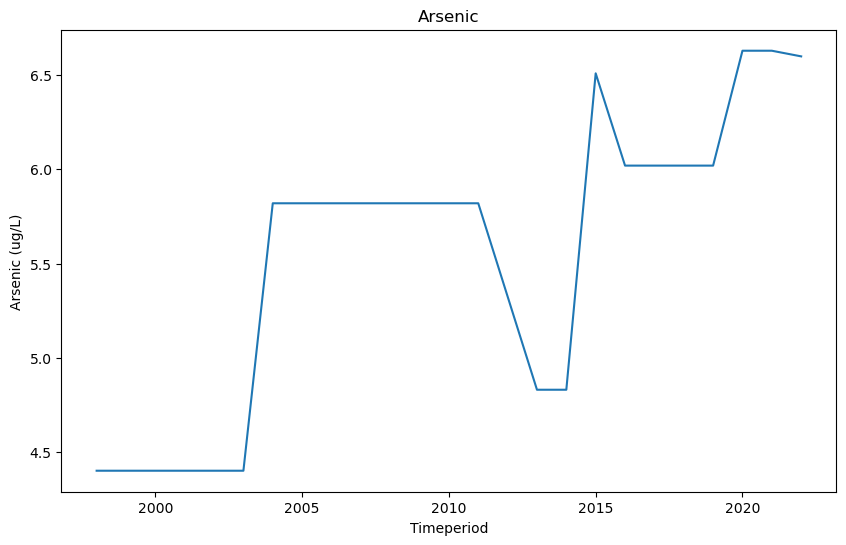

In [40]:
county_id = 'Aitkin'
data = arsenic_df[arsenic_df["countyServed"] == county_id]
plt.figure(figsize=(10, 6))
plt.plot(data["year"], data["max arsenic (ug/L)"])
plt.xlabel("Timeperiod")
plt.ylabel("Arsenic (ug/L)")
plt.title("Arsenic")
plt.show()

In [32]:
arsenic_df

,Unnamed: 0,year,countyServed,max arsenic (ug/L)
0,0,1998,Aitkin,4.40
1,1,1998,Anoka,11.00
2,2,1998,Becker,11.00
3,3,1998,Beltrami,3.80
4,4,1998,Benton,0.50
...,...,...,...,...
1898,1898,2022,Watonwan,8.94
1899,1899,2022,Wilkin,3.97
1900,1900,2022,Winona,3.03
1901,1901,2022,Wright,7.53


In [36]:
max_years_df = arsenic_df.loc[arsenic_df.groupby('countyServed')['max arsenic (ug/L)'].idxmax()]
max_years_df

,Unnamed: 0,year,countyServed,max arsenic (ug/L)
1642,1642,2020,Aitkin,6.63
427,427,2004,Anoka,20.00
428,428,2004,Becker,29.20
1471,1471,2018,Beltrami,10.50
1733,1733,2021,Benton,2.75
...,...,...,...,...
334,334,2002,Watonwan,15.00
1551,1551,2018,Wilkin,6.56
1900,1900,2022,Winona,3.03
424,424,2003,Wright,24.10


In [37]:
threshold = 10

# Filter the DataFrame to include only rows where 'value' is about 10
about_10_df = max_years_df[max_years_df['max arsenic (ug/L)'].between(threshold - 1, threshold + 1)]
about_10_df

,Unnamed: 0,year,countyServed,max arsenic (ug/L)
1471,1471,2018,Beltrami,10.50
1389,1389,2017,Brown,10.00
272,272,2002,Douglas,9.22
294,294,2002,Mahnomen,9.50
216,216,2001,Nicollet,10.00
1803,1803,2021,Stevens,9.25
588,588,2005,Swift,9.00


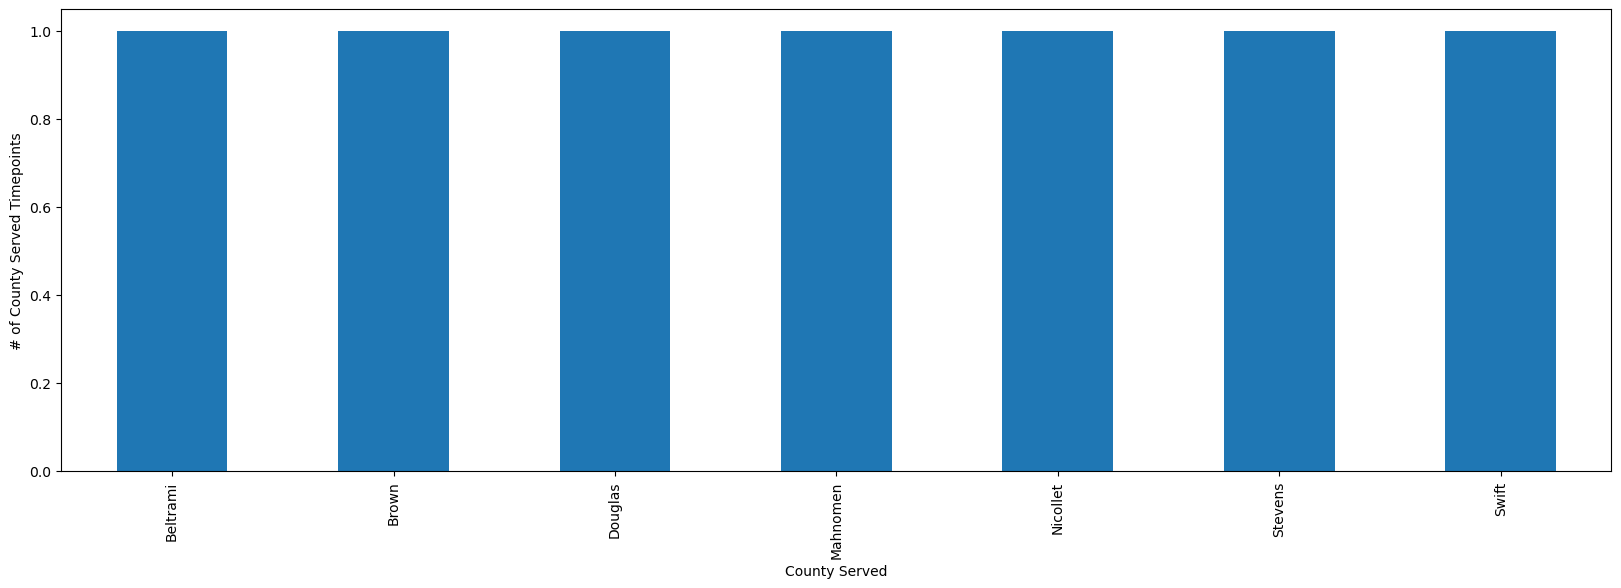

In [39]:
plt.figure(figsize=(20, 6))

max_county = about_10_df["countyServed"].value_counts()
max_county.plot.bar(color='tab:blue') 
plt.xlabel("County Served")
plt.ylabel("# of County Served Timepoints")

plt.show()
